# Sea Sponge Classification
Hello, I hope you are having a great day.

1. Import Packages
1. Then, we'll load the data, before visualize and preprocess it.
1. Load the model that is built using CNN and perform evaluations.

# Import Packages

In [80]:
import numpy as np
import glob
import os
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
import tensorflow as tf
from keras.models import Sequential #one after the other
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D,Flatten

# Sea Sponge:

The approximately 8,550 living sponge species are scientifically classified in the phylum Porifera, which is comprised of four distinct classes: 

* the Demospongiae (the most diverse, containing 90 percent of all living sponges), 
* Hexactinellida (the rare glass sponges), 
* Calcarea (calcareous sponges), 
* Homoscleromorpha (the rarest and simplest class, only recently recognized, with approximately 117 species).

In [81]:
class_names = ['calcarea', 'demospongiae', 'hexactinellida', 'homoscleromorpha']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)} # creating a dictionary 

nb_classes = len(class_names)
IMAGE_SIZE = (150, 150) #defining the image size in order to bring all the images to the same size

In [82]:
def load_data(dataset):
    output=[]   
    print("Loading {}".format(dataset))

    # Iterate through each folder corresponding to a category
    for folder in os.listdir(dataset): # os.listdir(dataset) will give all the folders inside the dataset folder
        label = class_names_label[folder] # this value is taken from the class_name_label dictionary created

        # Iterate through each image in our folder
        for file in tqdm(os.listdir(os.path.join(dataset, folder))): # this will list out all the files in the particular folder

            # Get the path name of the image
            img_path = os.path.join(os.path.join(dataset, folder), file)

            # Open and resize the img
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #convert
            image = cv2.resize(image, IMAGE_SIZE)  #resize
            resize_arr = np.asarray(image)  # array
            output.append([resize_arr,label]) 
    return output

In [83]:
data=load_data('../input/sea-sponge-image-classification/sea sponge/data') #loading data

 24%|██▎       | 12/51 [00:00<00:00, 114.60it/s]

Loading ../input/sea-sponge-image-classification/sea sponge/data


100%|██████████| 40/40 [00:00<00:00, 54.18it/s]


In [84]:
len(data) #there are totally 141 images

141

In [85]:
def separateImgLabel(data): #to separate the img arr and its category into X and y
    X=[]
    y=[]
    for img,label in data:
        X.append(img)
        y.append(label)
    return X,y

In [86]:
X,y=separateImgLabel(data)

In [87]:
#now Xtrain and Xtest is in the form of list([array]). converting into array and here each image is a row vector.
#-1 means that the length in that dimension is inferred
Xtrain=np.array(X).reshape(-1,150,150,3) 
Xtrain=Xtrain/255 #normalising so that the values will be close to 0
print(Xtrain.shape)

(141, 150, 150, 3)


In [88]:
Y=np.array(y)
Y.shape

(141,)

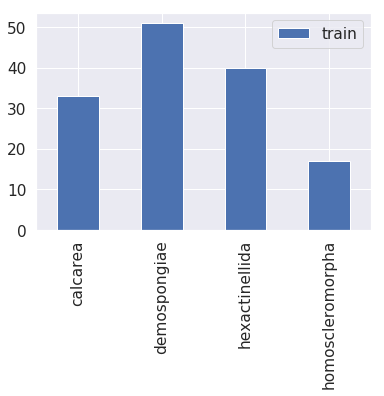

In [89]:
import pandas as pd #visualization

_, train_counts = np.unique(Y, return_counts=True)

pd.DataFrame({'train': train_counts,}, 
             index=class_names
            ).plot.bar()
plt.show()

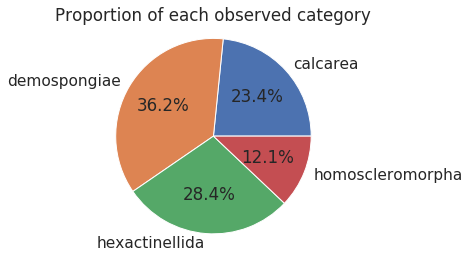

In [90]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [91]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

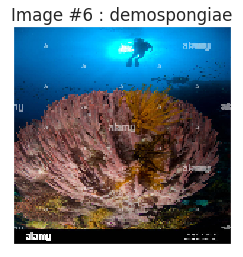

In [92]:
display_random_image(class_names,Xtrain, Y)

In [93]:
#now we do one hot encoding to convert the class labels into 0s and 1s.
from keras.utils import np_utils
ytrain=np_utils.to_categorical(y,4) 

Using TensorFlow backend.


In [94]:
ytrain.shape

(141, 4)

# You can use the saved model using the following command.

In [36]:
#model.save('cnn_model_sea_sponge.h5')
#model=tf.keras.models.load_model('../input/model-sea-spong-cnn/cnn_model_sea_sponge.h5', custom_objects=None, compile=True)
#model.summary()

****Below is the built CNN Model.****

In [99]:
def base_cnn():
    model = Sequential()

    #first convolutional layer
    model.add(Conv2D(16,(3,3),strides=(1,1),padding='valid',activation='relu',input_shape=(150,150,3)))
    # the first cn layer will have 16 filters each of size 3x3, and the valid padding is without zero padding and the activation
    #function is 'relu' which takes max(0,x) where x is any value
    model.add(MaxPool2D(pool_size = (2,2)))
    #max pooling by 2x2 will reduce the size to half.
    model.add(Dropout(0.25))
    #dropout is added in order to avoid overfitting

    
    #second convolutional layer
    model.add(Conv2D(32,(3,3),strides=(1,1),padding='valid',activation='relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    
    #third convolutional layer
    model.add(Conv2D(64,(3,3),strides=(1,1),padding='valid',activation='relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    
    #fourth convolutional layer
    model.add(Conv2D(128,(3,3),strides=(1,1),padding='valid',activation='relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.25))
    
    #fifth convolutional layer
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='valid',activation='relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten()) #flatten to convert to a vector
    #hidden layer
    model.add(Dense(64,activation='relu')) #a fully connected layer with 64 neurons
    model.add(Dense(128,activation='relu')) #a fully connected layer with 128 neurons

    #output layer 
    model.add(Dense(4,activation='softmax')) #softmax will provide the probability distributions of the classes 
    #and the index of the maximum probability will be taken as the predicted class. np.argmax(predictions)
    return model


In [100]:
model=base_cnn()
model.summary()
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']) #using the adam optimizer
history=model.fit(Xtrain,ytrain,epochs=70,batch_size=16,verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0         
__________

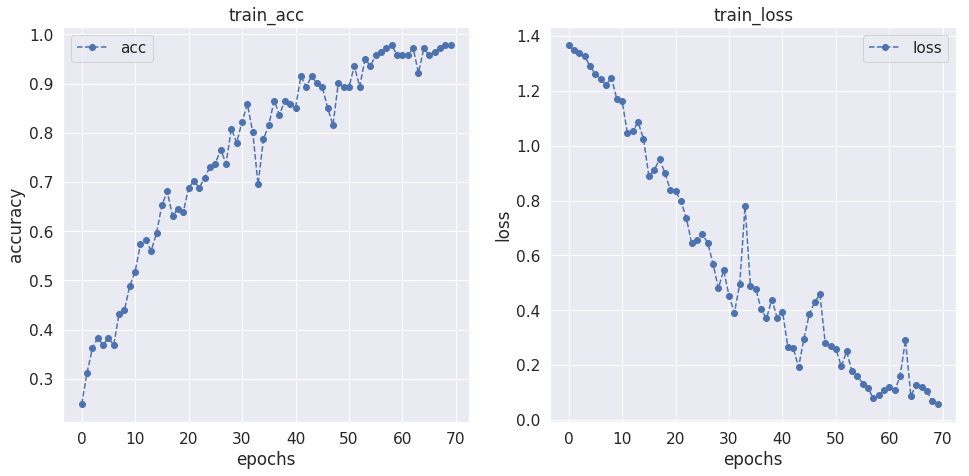

In [102]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the neural network.
    """
    fig = plt.figure(figsize=(16,16))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['acc'],'bo--', label = "acc")
    plt.title("train_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.title("train_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()
    
plot_accuracy_loss(history)

In [103]:
def normalize_image(img):
    data = np.ndarray(shape=(1, 150, 150, 3), dtype=np.float32)
    # Normalize the image
    normalized_image_array = (img.astype(np.float32) / 80.0) - 1
    # Load the image into the array
    data[0] = normalized_image_array
    
    prediction = model.predict(data)
    pred=np.argmax(prediction) #takes the index of the highest probability among the distribution of the classes
    prob=np.max(prediction)
    return pred,prob

In [118]:
def detect_sponge(detect_img):
    #Select blue channel
    blueChannelMat = detect_img[:,:,0]
    #Mean filtering (the larger the filtering window, the more serious the image distortion is, the more blurred it is)
    blurMat = cv2.blur(blueChannelMat,(3,3))#3,3 means that the convolution kernel size is 3x3
    #Dynamic threshold segmentation (otsu method)
    t,thresMat = cv2.threshold(blurMat,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    #t,thresMat = cv2.threshold(blurMat,70,255,cv2.THRESH_BINARY_INV)
    contours, hierarchy = cv2.findContours(thresMat, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    detect_img=cv2.drawContours(detect_img,contours,-1,(0,255,0),-1)
    # Iterate through all the contours
    for contour in contours:
        # Find bounding rectangles
        x,y,w,h = cv2.boundingRect(contour)
        # Draw the rectangle
        cv2.rectangle(detect_img,(x,y),(x+w,y+h),(0,0,0),2)
        
    return detect_img

In [109]:
def predict_image_class(image):
    # Open and resize the img
    img=image.copy()
    #image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMAGE_SIZE) 
    resize_arr = np.asarray(image)
    prediction,prob=normalize_image(resize_arr) 
    detect_img=detect_sponge(img)
    
    fig = plt.figure(figsize=(8,8))
    
    plt.subplot(221)
    plt.imshow(a_img)
    plt.title("Test Image")
    
    plt.subplot(222)
    plt.imshow(detect_img)
    plt.title("Sponge Detected Image")
    
    plt.show()
    return prediction,prob

****To test an image with the dataset you have,  ****

****If it is a single image:****

1. img_path = 'Your file path for the image'

1. img1=cv2.imread(img_path)

1. pred,prob=predict_image_class(a_img)

****If it is a folder of test images:****

1. all_images = [cv2.imread(file) for file in glob.glob('Your test folder path/*.images extension(.jpg or jpeg)')]

1. for i in range(len(all_images)): 
    
        a_img=all_images[i]

        pred,prob=predict_image_class(a_img)

        print("The sponge is more likely to be a/an ",class_names[pred].upper(),"with a probability of ",prob )

In [112]:
all_images = [cv2.imread(file) for file in glob.glob('../input/sea-sponge-image-classification/sea sponge/test/*.jpg')]
print(f"There are totally {len(all_images)} images in the test dataset")

There are totally 15 images in the test dataset


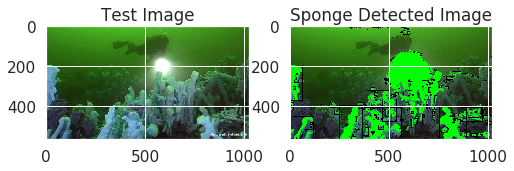

The sponge is more likely to be a/an  DEMOSPONGIAE with a probability of  1.0


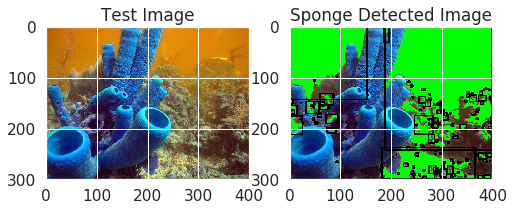

The sponge is more likely to be a/an  DEMOSPONGIAE with a probability of  1.0


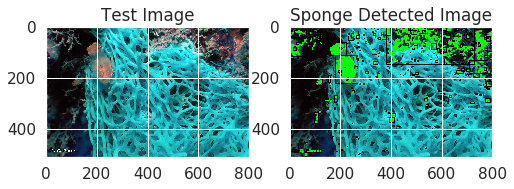

The sponge is more likely to be a/an  CALCAREA with a probability of  1.0


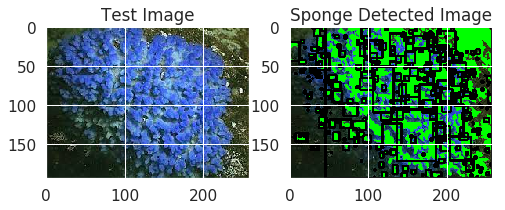

The sponge is more likely to be a/an  CALCAREA with a probability of  1.0


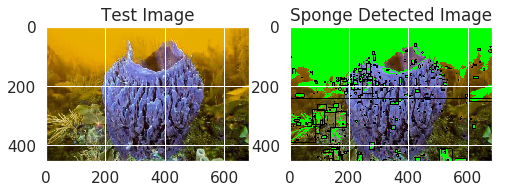

The sponge is more likely to be a/an  DEMOSPONGIAE with a probability of  1.0


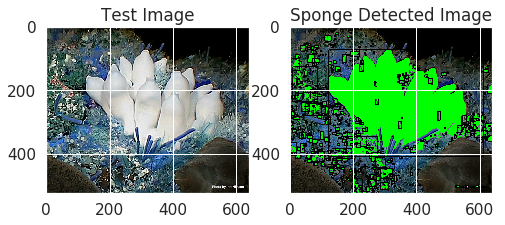

The sponge is more likely to be a/an  CALCAREA with a probability of  0.995663


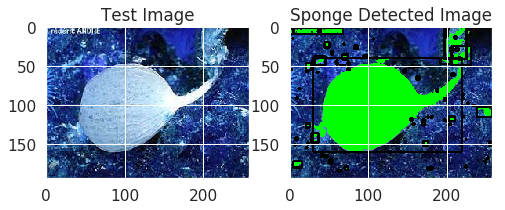

The sponge is more likely to be a/an  CALCAREA with a probability of  1.0


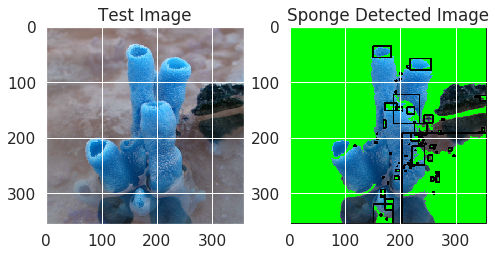

The sponge is more likely to be a/an  CALCAREA with a probability of  0.5298897


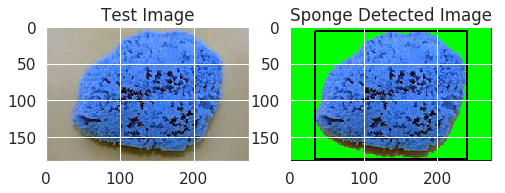

The sponge is more likely to be a/an  DEMOSPONGIAE with a probability of  1.0


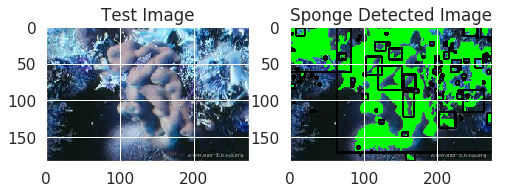

The sponge is more likely to be a/an  CALCAREA with a probability of  0.99997365


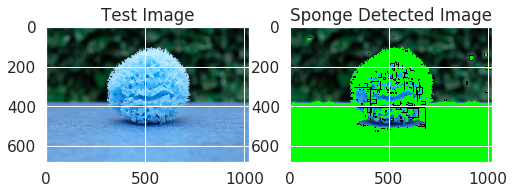

The sponge is more likely to be a/an  CALCAREA with a probability of  1.0


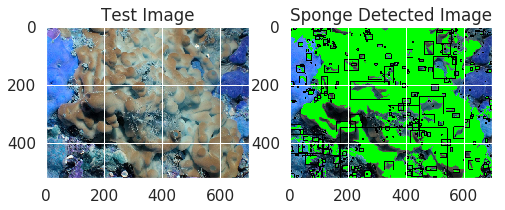

The sponge is more likely to be a/an  DEMOSPONGIAE with a probability of  0.99999964


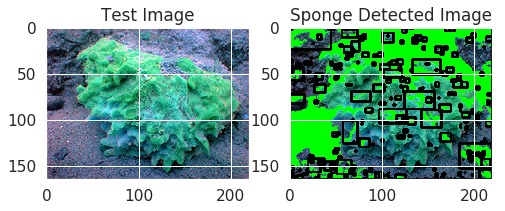

The sponge is more likely to be a/an  HEXACTINELLIDA with a probability of  0.80347925


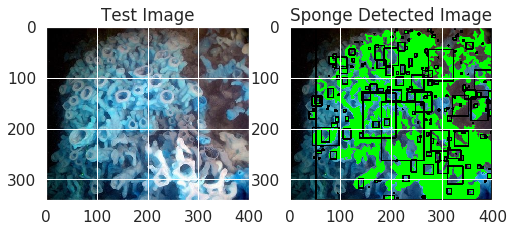

The sponge is more likely to be a/an  HEXACTINELLIDA with a probability of  0.65639806


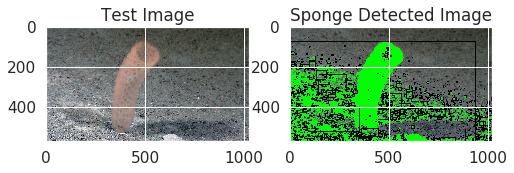

The sponge is more likely to be a/an  HEXACTINELLIDA with a probability of  0.9999496


In [119]:
#img_chosen=np.random.randint(0,len(all_images)) 

for i in range(len(all_images)): # this for loop is to print all the images in the test dataset with its prediction.
    a_img=all_images[i]
    pred,prob=predict_image_class(a_img)
    print("The sponge is more likely to be a/an ",class_names[pred].upper(),"with a probability of ",prob )

# ****Conclusion****

# With less amount of data, the model performs good with about 97.87% Accuracy.